# **Project Description** : Medical fees

#### The medical fee data that has been collected contains 1338 rows and 7 variables. The aim of this data science project is to build a predictive model that can estimate the charges for each person based on several variables.
## Our objective
#### Using this model, we will try to understand the variables that play a key role in increasing or decreasing the charges.

## We will handle this problem in a structured way. We will be following the table of content given below:

### 1.   Hypothesis Generation
### 2.   Loading Packages and Data
### 3.   Data Structure and Content
### 4.   Exploratory Data Analysis
### 5.   Encoding Categorical Variables
### 6.   Feature Engineering
### 7.   Modeling

# **Hypothesis Generation**

#### 1. Age: 
* It is expected that older people may have higher medical charges due to age-related health issues.

#### 2. Sex: 
* Gender may also play a role in determining medical charges. For example, women may have higher charges due to reproductive health issues.

#### 3. BMI: 
* Body mass index (BMI) is a measure of body fat based on height and weight. It is possible that people with higher BMI may have higher medical charges due to obesity-related health issues.

#### 4. Children: 
* It is possible that people with more children may have higher medical charges, as they may have more family members with health issues.

#### 5. Smoker: 
* Smoking is a well-known risk factor for several health conditions. Therefore, it is expected that smokers may have higher medical charges compared to non-smokers.

#### 6. Region: 
* Geographic location may also play a role in determining medical charges. For example, people living in urban areas may have higher charges due to higher living costs.

# **Loading Packages and Data**

In [138]:
# install required libs

# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn


In [139]:
# Loading Packages
import numpy as np
import pandas as pd
# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Data preprocessing and feature engineering
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
# Train-test split and cross-validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Linear regression model and evaluation metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
#ignore annoying warning (from sklearn and seaborn)
import warnings
warnings.filterwarnings('ignore')

In [140]:
# Loading Data
df = pd.read_csv("./data/frais_medicaux.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Data Dictionary

*   **Age**: The age of the person (in years).
*   **Sex**: The gender of the person.
*   **BMI**: The body mass index of the person (calculated as weight in kilograms divided by height in meters squared).
*   **Children**: The number of children the person has.
*   **Smoker**: Whether the person smokes or not.
*   **Region**: The geographic region where the person lives.
*   **Charges**: The medical charges for the person (in USD).

# **Data Structure and Content**

In [141]:
df.shape

(1338, 7)

The output (1338, 7) indicates that the DataFrame contains 1338 rows (observations) and 7 columns (variables).

In [142]:
# Data type of each column
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

* The **age** and **children** columns are of integer data type (int64).
* The **bmi** and **charges** columns are of float data type (float64).
* The **sex**, **smoker**, and **region** columns are of object data type, which usually represents string values (object). Since these columns contain categorical values, we will need to perform appropriate encoding techniques such as label encoding or one-hot encoding before using them in a predictive model.

In [143]:
# Return unique values of columns that have an object data type.
for col in df.columns:
  if df[col].dtype == object:
    print(col+ ' : ',df[col].unique())

sex :  ['female' 'male']
smoker :  ['yes' 'no']
region :  ['southwest' 'southeast' 'northwest' 'northeast']


* For the **sex** column, the unique values are **['female', 'male']**.
* For the **smoker** column, the unique values are **['yes', 'no']**.
* For the **region** column, the unique values are **['southwest', 'southeast', 'northwest', 'northeast']**.

In [144]:
# get the number of missing data points per column
missingData = df.isnull().sum()
missingData

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The output shows that there are no missing data points in our DataFrame     

In [145]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* The data contains information on the age, sex, BMI, number of children, smoking status, region, and medical charges of individuals.
* There are 1,338 observations in the dataset.
* The mean age of the individuals is around 39 years old.
* The mean BMI of the individuals is around 30.7, which is considered obese according to the World Health Organization.
* The average number of children is 1.
* The mean medical charge is around $13,270, with a standard deviation of $12,110, indicating a large spread in the data.
* The minimum charge is $1,121 and the maximum charge is $63,770, indicating a wide range of charges.
* The majority of individuals (50%) have charges under $9,382, while 25% of individuals have charges under $4,740 and 75% of individuals have charges under $16,640.

# **Exploratory Data Analysis**

## Handling Outlier

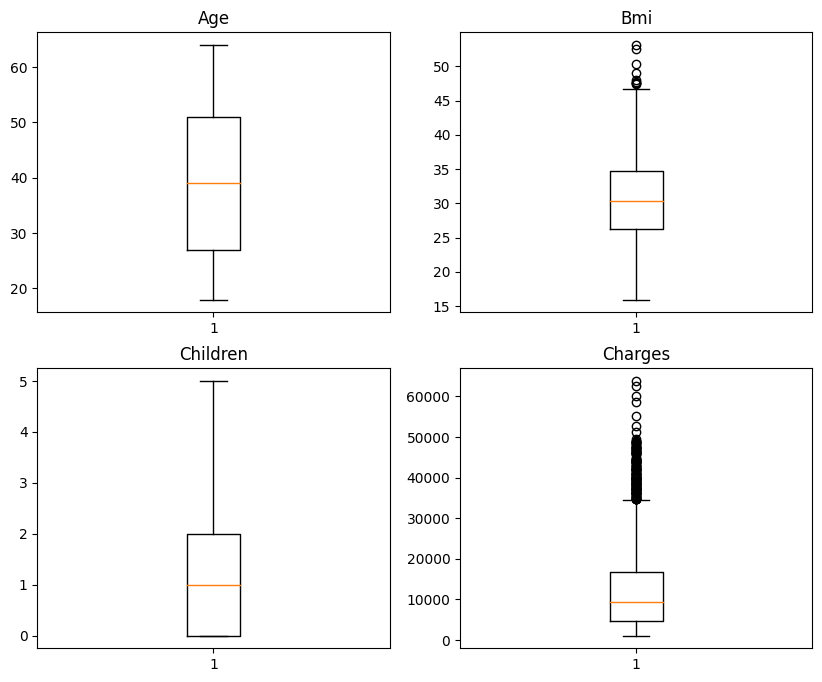

In [146]:
# List of column names to plot
columns = ['age', 'bmi', 'children', 'charges']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot box plots for each column on a separate subplot
for i, col in enumerate(columns):
    row_index = i // 2
    col_index = i % 2
    axs[row_index, col_index].boxplot(df[col])
    axs[row_index, col_index].set_title(col.capitalize())

# Display the plots
plt.show()

In [147]:
def replace_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_ranger=Q1-(1.5*IQR)
    upper_ranger=Q3+(1.5*IQR)
    return lower_ranger, upper_ranger

In [148]:
# low, up = replace_outlier(df['bmi'])
# df['bmi']=np.where(df['bmi']>up,up,df['bmi'])
# df['bmi']=np.where(df['bmi']<low,low,df['bmi'])

## Univariate Analysis

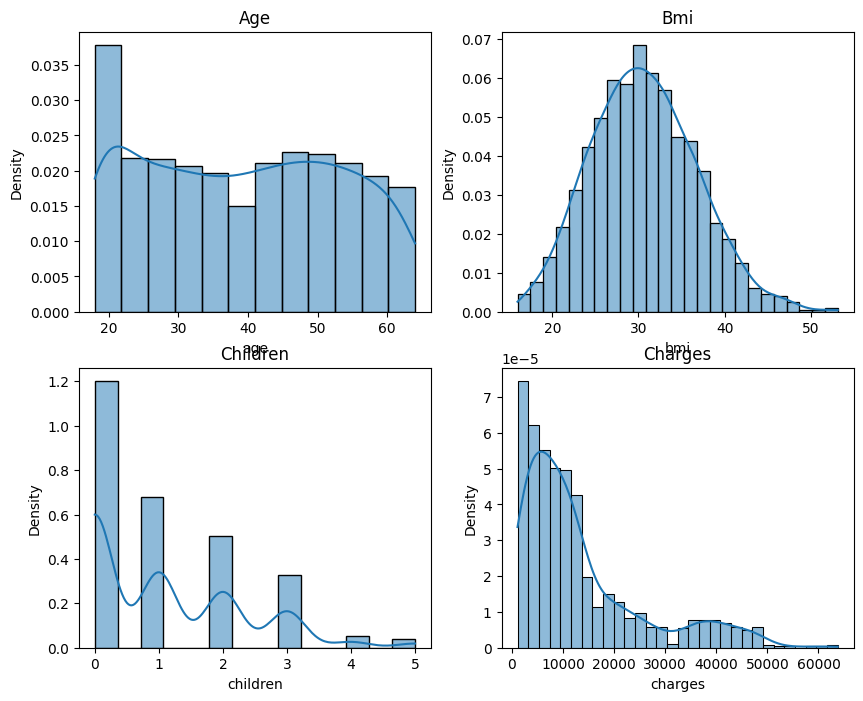

In [149]:
# List of column names to plot
columns = ['age', 'bmi', 'children', 'charges']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot histograms for each column on a separate subplot
for i, col in enumerate(columns):
    row_index = i // 2
    col_index = i % 2
    sns.histplot(df[col], kde=True, stat="density", ax=axs[row_index, col_index])
    axs[row_index, col_index].set_title(col.capitalize())

# Display the plots
plt.show()

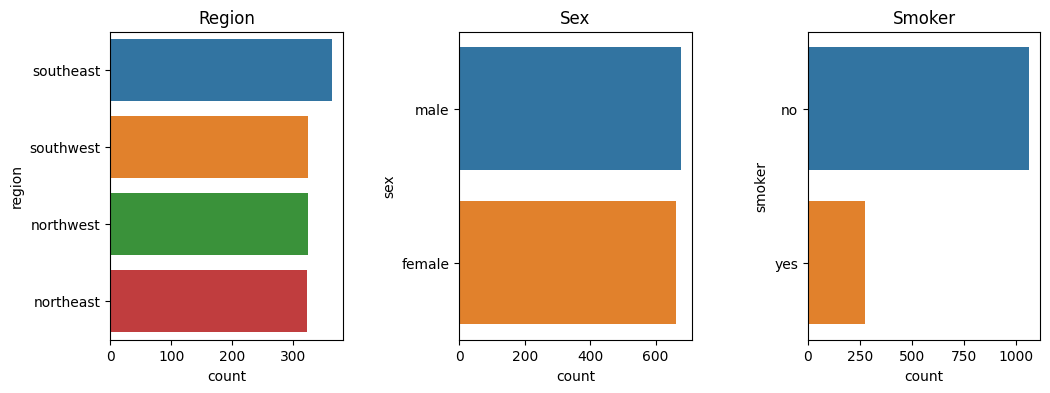

In [150]:
# List of column names to plot
columns = ['region', 'sex', 'smoker']

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot count plots for each column on a separate subplot
for i, col in enumerate(columns):
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axs[i])
    axs[i].set_title(col.capitalize())

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Display the plots
plt.show()

## Bivariate Analysis

In [151]:
# Correlation between all the variables
corr = df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [152]:
corr['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

<Axes: >

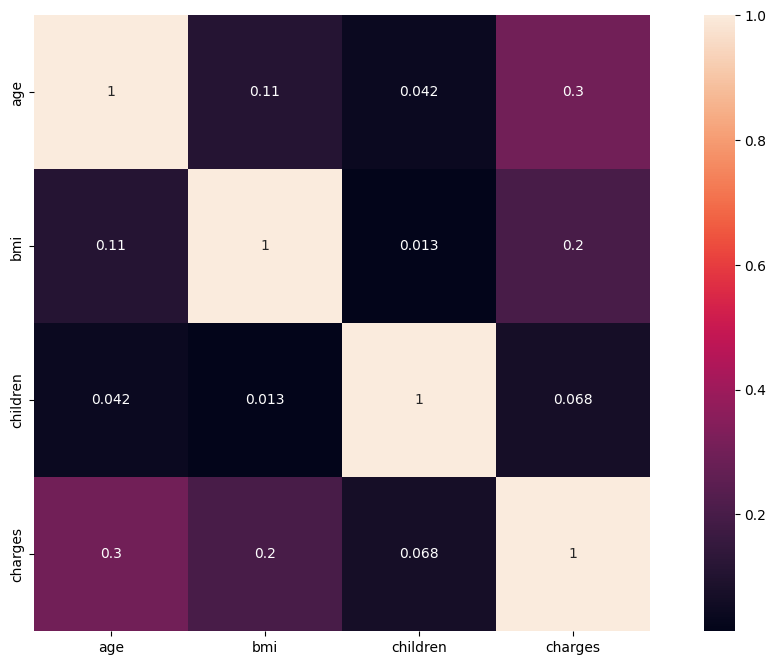

In [153]:
plt.figure(figsize = (14, 8))
sns.heatmap(corr, annot = True, square = True)

# **Categorical Variables**

In [154]:
def Ordinal_Encoder(df, cols):
    ordinal_encoder = OrdinalEncoder()
    df[cols] = ordinal_encoder.fit_transform(df[cols])
    return df

In [155]:
categorical_cols = ['region', 'sex', 'smoker']
df = Ordinal_Encoder(df, categorical_cols)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [156]:
sc = StandardScaler()
scaled_features = sc.fit_transform(df.values)
df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
df

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915,-0.220551
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326,-0.914002
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495,-0.961596
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905,-0.930362


# **Feature engineering**

age         1.500636
smoker      0.369171
sex         0.176660
children    0.161562
region      0.076382
bmi         0.074477
Name: MI Scores, dtype: float64


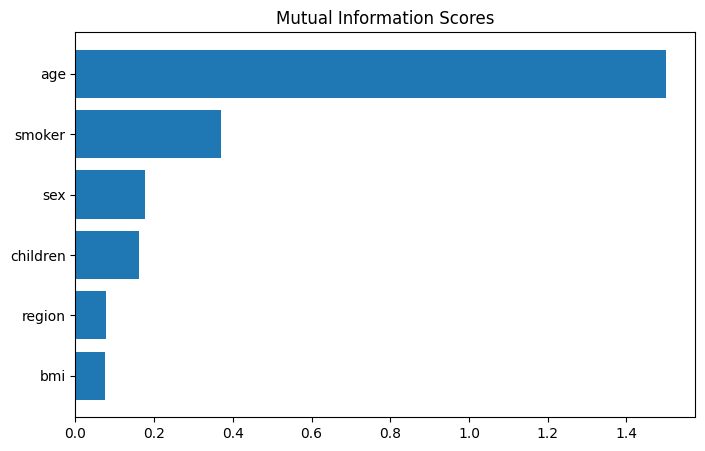

In [157]:
X = df.copy()
y = X.pop("charges")
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
print(mi_scores)
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# **Model**

In [158]:
def test_regression_models(inputs, target):
    model = LinearRegression()
    # evaluate the model by performing cross-validation
    cv_score = cross_val_score(model, inputs, target, cv=6, n_jobs=-1)

    #Peport performance:
    print("\nModel Report : ")
    print("CV Score : (Mean , %.4g) | (Std , %.4g) | (Min , %.4g) | (Max , %.4g)" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    return model

In [159]:
inputs = df.copy()
target = inputs.pop("charges")
model = test_regression_models(inputs, target)


Model Report : 
CV Score : (Mean , 0.7459) | (Std , 0.02884) | (Min , 0.7019) | (Max , 0.795)


## Github : 
*  [ABDELLAH-Hallou/medical-fees](https://github.com/ABDELLAH-Hallou/medical-fees)